In [1]:
%run 0_Regressions_Common.ipynb

In [2]:
file_suffix='mar9'

with open('../OtherData/CombinedDFAdjPopulationExcessMobility_%s.pkl' % (file_suffix), 'rb') as handle:
    df = pickle.load(handle)

In [3]:
#with open('../OtherData/0_regions_to_skip.pkl', 'rb') as handle:
#    regions_to_skip = pickle.load(handle)

with open('../OtherData/0_val_7_regions_mar9.pkl', 'rb') as handle:
    val_regions = pickle.load(handle)

with open('../OtherData/0_test_8_regions_mar9.pkl', 'rb') as handle:
    test_regions = pickle.load(handle)
     
regions = val_regions #list(set([x for x in val_regions if x not in regions_to_skip]))  
print("Number of val regions: %d" % (len(regions)))

Number of val regions: 7


In [4]:
val_regions = [22, 44, 32, 43, 23, 21, 11]
test_regions = [41.0, 42.0, 51.0, 24.0, 61.0, 62.0, 31.0]

In [5]:
all_regions = list(set(df["Region"].values))

In [6]:
df[["Region", "population"]].tail(16)

,Region,population
4698,11.0,1111643.0
4699,21.0,110109.0
4700,22.0,129012.0
4701,23.0,441589.0
4702,24.0,663912.0
4703,29.0,49663.0
4704,31.0,597181.0
4705,32.0,444408.0
4706,41.0,452426.0
4707,42.0,783102.0


In [15]:
print(all_regions)

change_font_size(18)

[11.0, 21.0, 22.0, 23.0, 24.0, 29.0, 31.0, 32.0, 41.0, 42.0, 43.0, 44.0, 51.0, 61.0, 62.0, 71.0]


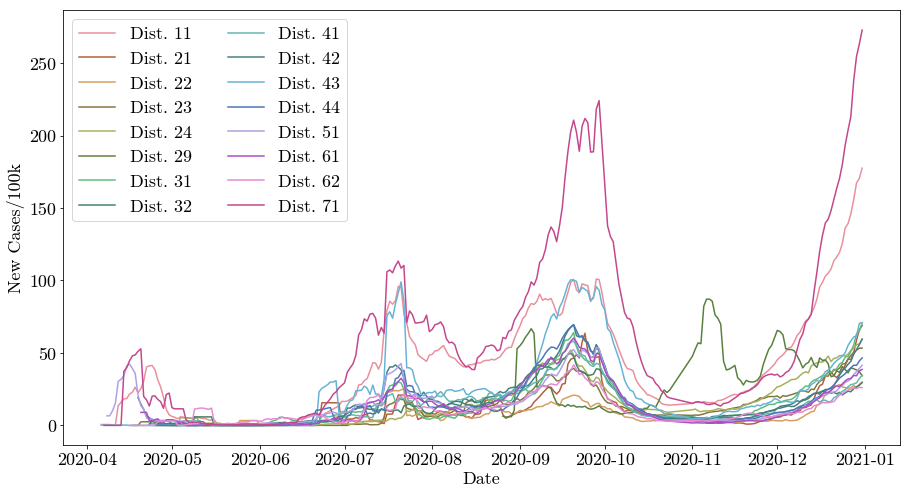

In [41]:
fig, ax = plt.subplots(figsize=(15,8))

colors = sns.husl_palette(n_colors=16, l = 0.7, s=0.7)  # a list of RGB tuples
dark_colors = sns.husl_palette(l = 0.5, n_colors=16, s=0.7)  # a list of RGB tuples

region_to_color_dict = dict()
region_to_dark_color_dict = dict()
all_regions.sort()
for i in range(len(all_regions)):
     
    region = all_regions[i]
    if i % 2 == 0:
        color = colors[i]
    else:
        color = dark_colors[i]
    region_to_color_dict[region] = color
    region_to_dark_color_dict[region] = dark_colors[i]
    
    
    od_df=df.where(df["Region"]==region).dropna()
    train = od_df.where(od_df["Date"] >= train_begin).where(od_df["Date"] <= '2020-10-24').dropna()
    test = od_df.where(od_df["Date"] >= '2020-11-01').where(od_df["Date"] <= test_end_nov).dropna()
    dec = od_df.where(od_df["Date"] >= '2020-12-01').where(od_df["Date"] <= '2020-12-31').dropna()

    train_new = train.sort_index().dropna()
    test_new = test.sort_index().dropna()
    dec_new = dec.sort_index().dropna()
    y_train = train_new[newcases_label]
    y_test = test_new[newcases_label]
    y_dec = dec_new[newcases_label] 
    
    train_copy = train.copy()
    test_copy = test.copy()
    dec_copy = dec.copy()

    train_copy["actual"] = y_train
    train_copy["pred"] = y_train
    test_copy["actual"] = y_test
    dec_copy["actual"] = y_dec
        
    pred_all = pd.concat([train_copy, test_copy, dec_copy])

    # plot the final result on a sample dataset    
    toplot = pred_all
    toplot['Date'] = pd.to_datetime(toplot['Date'])
    plt.plot(toplot['Date'], toplot['actual'], color=color, label='Dist. %d' % (region))
plt.legend(loc=0, ncol=2)

change_font_size(18)
plt.xlabel("Date")
plt.ylabel("New Cases/100k")
plt.show()

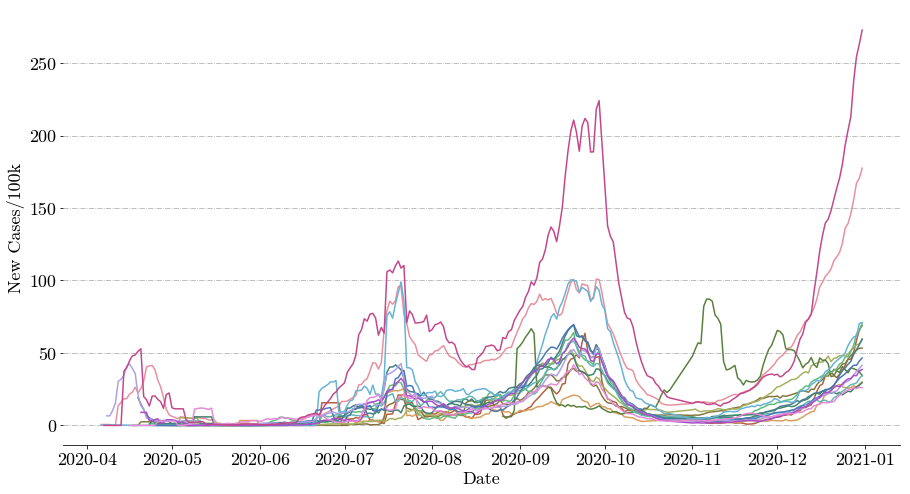

In [43]:
fig, ax = plt.subplots(figsize=(15,8))

region_to_color_dict = dict()
region_to_dark_color_dict = dict()
all_regions.sort()
for i in range(len(all_regions)):
     
    region = all_regions[i]
    if i % 2 == 0:
        color = colors[i]
    else:
        color = dark_colors[i]
    region_to_color_dict[region] = color
    region_to_dark_color_dict[region] = dark_colors[i]
    
    
    od_df=df.where(df["Region"]==region).dropna()
    train = od_df.where(od_df["Date"] >= train_begin).where(od_df["Date"] <= '2020-10-24').dropna()
    test = od_df.where(od_df["Date"] >= '2020-11-01').where(od_df["Date"] <= test_end_nov).dropna()
    dec = od_df.where(od_df["Date"] >= '2020-12-01').where(od_df["Date"] <= '2020-12-31').dropna()

    train_new = train.sort_index().dropna()
    test_new = test.sort_index().dropna()
    dec_new = dec.sort_index().dropna()
    y_train = train_new[newcases_label]
    y_test = test_new[newcases_label]
    y_dec = dec_new[newcases_label] 
    
    train_copy = train.copy()
    test_copy = test.copy()
    dec_copy = dec.copy()

    train_copy["actual"] = y_train
    train_copy["pred"] = y_train
    test_copy["actual"] = y_test
    dec_copy["actual"] = y_dec
        
    pred_all = pd.concat([train_copy, test_copy, dec_copy])

    # plot the final result on a sample dataset    
    toplot = pred_all
    toplot['Date'] = pd.to_datetime(toplot['Date'])
    plt.plot(toplot['Date'], toplot['actual'], color=color, label='Dist. %d' % (region))
#plt.legend(loc=0, ncol=2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(axis='y', linestyle='-.')
change_font_size(18)
plt.xlabel("Date")
plt.ylabel("New Cases/100k")
plt.show()

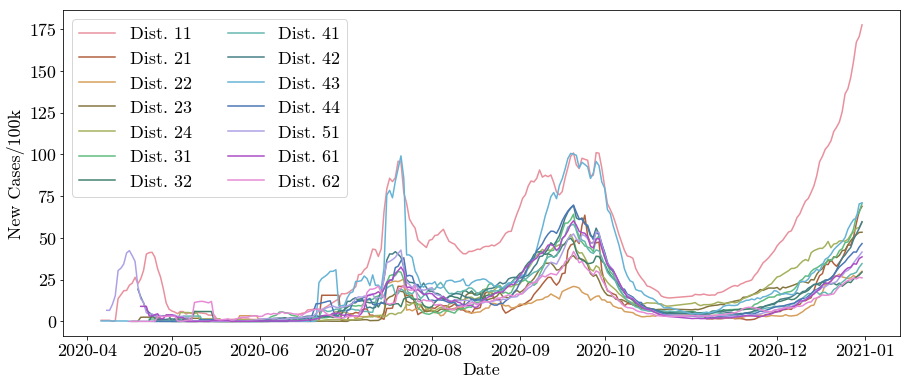

In [44]:
fig, ax = plt.subplots(figsize=(15,6))

change_font_size(18)

all_regions.sort()
for i in range(len(all_regions)):
     
    region = all_regions[i]
    if i % 2 == 0:
        color = colors[i]
    else:
        color = dark_colors[i]
    if region != 71 and region != 29:

        od_df=df.where(df["Region"]==region).dropna()
        train = od_df.where(od_df["Date"] >= train_begin).where(od_df["Date"] <= '2020-10-24').dropna()
        test = od_df.where(od_df["Date"] >= '2020-11-01').where(od_df["Date"] <= test_end_nov).dropna()
        dec = od_df.where(od_df["Date"] >= '2020-12-01').where(od_df["Date"] <= '2020-12-31').dropna()

        train_new = train.sort_index().dropna()
        test_new = test.sort_index().dropna()
        dec_new = dec.sort_index().dropna()
        y_train = train_new[newcases_label]
        y_test = test_new[newcases_label]
        y_dec = dec_new[newcases_label] 

        train_copy = train.copy()
        test_copy = test.copy()
        dec_copy = dec.copy()

        train_copy["actual"] = y_train
        train_copy["pred"] = y_train
        test_copy["actual"] = y_test
        dec_copy["actual"] = y_dec

        pred_all = pd.concat([train_copy, test_copy, dec_copy])

        # plot the final result on a sample dataset    
        toplot = pred_all
        toplot['Date'] = pd.to_datetime(toplot['Date'])
        plt.plot(toplot['Date'], toplot['actual'], color=color, label='Dist. %d' % (region))
plt.legend(loc=0, ncol=2)
plt.xlabel("Date")
plt.ylabel("New Cases/100k")
plt.show()

In [10]:
dump_to_pickle(region_to_color_dict, "../OtherData/RegionColor.pkl")

dump_to_pickle(region_to_dark_color_dict, "../OtherData/RegionDarkColor.pkl")

Saved file
Saved file


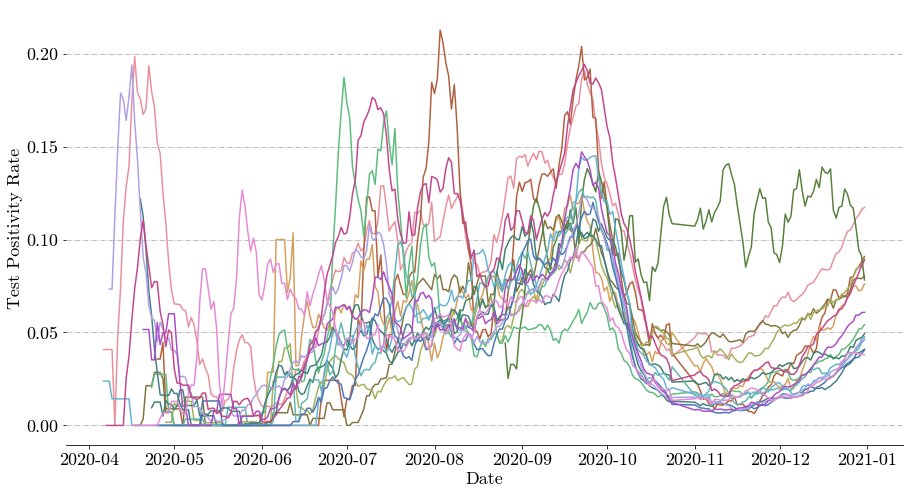

In [45]:
fig, ax = plt.subplots(figsize=(15,8))

change_font_size(18)

region_to_color_dict = dict()
region_to_dark_color_dict = dict()
all_regions.sort()
for i in range(len(all_regions)):
     
    region = all_regions[i]
    if i % 2 == 0:
        color = colors[i]
    else:
        color = dark_colors[i]
    region_to_color_dict[region] = color
    region_to_dark_color_dict[region] = dark_colors[i]
    
    
    od_df=df.where(df["Region"]==region).dropna()
    train = od_df.where(od_df["Date"] >= train_begin).where(od_df["Date"] <= '2020-10-24').dropna()
    test = od_df.where(od_df["Date"] >= '2020-11-01').where(od_df["Date"] <= test_end_nov).dropna()
    dec = od_df.where(od_df["Date"] >= '2020-12-01').where(od_df["Date"] <= '2020-12-31').dropna()

    train_new = train.sort_index().dropna()
    test_new = test.sort_index().dropna()
    dec_new = dec.sort_index().dropna()
    y_train = train_new[positivity_label]
    y_test = test_new[positivity_label]
    y_dec = dec_new[positivity_label] 
    
    train_copy = train.copy()
    test_copy = test.copy()
    dec_copy = dec.copy()

    train_copy["actual"] = y_train
    train_copy["pred"] = y_train
    test_copy["actual"] = y_test
    dec_copy["actual"] = y_dec
        
    pred_all = pd.concat([train_copy, test_copy, dec_copy])

    # plot the final result on a sample dataset    
    toplot = pred_all
    toplot['Date'] = pd.to_datetime(toplot['Date'])
    plt.plot(toplot['Date'], toplot['actual'], color=color, label='Dist. %d' % (region))
#plt.legend(loc=0, ncol=2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(axis='y', linestyle='-.')
change_font_size(18)
plt.xlabel("Date")
plt.ylabel("Test Positivity Rate")
plt.show()